In [1]:
import keras.metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import seaborn as sns
from sklearn import metrics
import umap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from IPython.display import Javascript
from nbconvert import HTMLExporter
import time
import os
import tempfile

In [2]:
model = tf.keras.models.load_model(filepath="../models/TrainedEncoder.h5", compile=True)
model.summary()


2022-03-02 16:46:22.959895: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 5, 1)]        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 4, 30)         330       
                                                                 
 batch_normalization_1 (Batc  (None, 76, 4, 30)        304       
 hNormalization)                                                 
                                                                 
 average_pooling2d_1 (Averag  (None, 19, 4, 30)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 3, 20)         4820      
                                                                 
 batch_normalization_2 (Batc  (None, 16, 3, 20)        64  

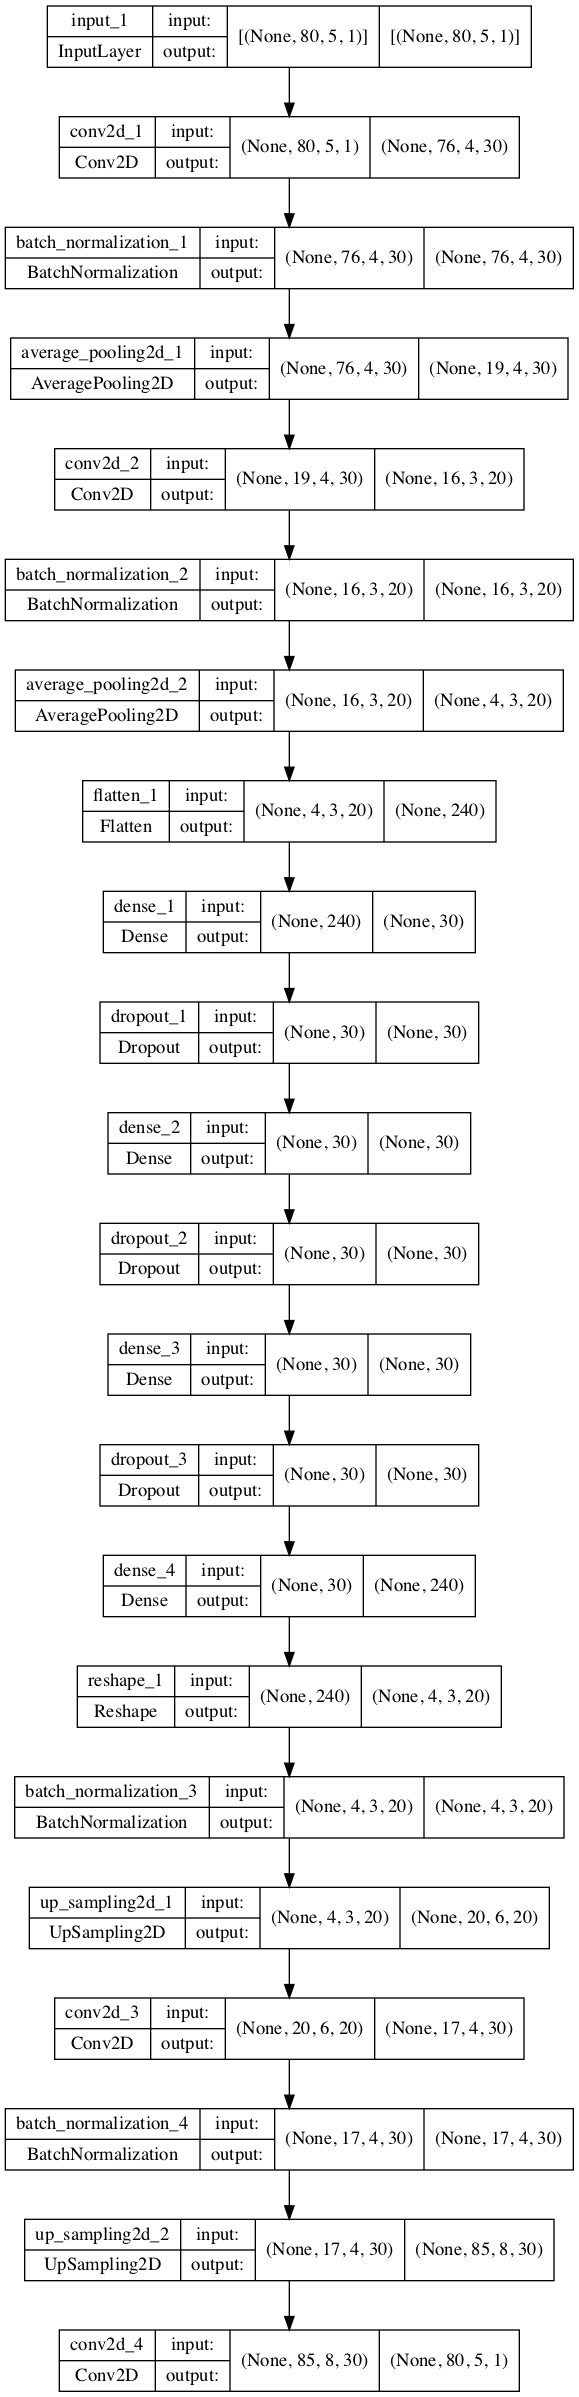

In [3]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = tf.keras.Sequential([
    keras.Input(shape=(256,1562,1)),
    layers.Conv2D(filters=1, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", strides=(1,2), padding="same"),
    layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format="channels_last"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", strides=(1,2), padding="same"),
    layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format="channels_last"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,3), padding="same"),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format="channels_last"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,3), padding="same"),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
])
model.build()
model.summary()

In [16]:
decoder = keras.Sequential([
    layers.InputLayer(input_shape=128, batch_size=32),
    layers.Dense(5632,),
    layers.Reshape(target_shape = (16,11,32)),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.UpSampling2D(size=(2,3), interpolation="nearest", data_format="channels_last"),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", strides=(1,2), padding="same"),
    layers.UpSampling2D(size=(2,3), interpolation="nearest", data_format="channels_last"),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", strides=(1,2), padding="same"),
    layers.UpSampling2D(size=(4,4), interpolation="nearest", data_format="channels_last"),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
    layers.Conv2DTranspose(filters=1, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=1),
])
decoder.build()
decoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (32, 5632)                726528    
                                                                 
 reshape_6 (Reshape)         (32, 16, 11, 32)          0         
                                                                 
 batch_normalization_56 (Bat  (32, 16, 11, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_transpose_30 (Conv2D  (32, 16, 11, 32)         9248      
 Transpose)                                                      
                                                                 
 up_sampling2d_18 (UpSamplin  (32, 32, 33, 32)         0         
 g2D)                                                            
                                                     

In [18]:
model = tf.keras.Sequential([
    keras.Input(shape=(256,1562,1)),
    layers.ZeroPadding2D(padding=((0,0),(243,243)), data_format="channels_last"),
    layers.Conv2D(filters=1, kernel_size=(3,3), data_format="channels_last", padding="same", strides=1),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
])
model.build()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_3 (ZeroPaddi  (None, 256, 2048, 1)     0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 256, 2048, 1)      10        
                                                                 
 batch_normalization (BatchN  (None, 256, 2048, 1)     4         
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 2048, 1)      0         
                                                                 
 conv2d_47 (Conv2D)          (None, 128, 512, 64)      640       
                                                                 
 conv2d_48 (Conv2D)          (None, 64, 128, 32)     

In [19]:
decoder = tf.keras.Sequential([
    keras.Input(shape=256),
    layers.Dense(16384, activation="relu"),
    layers.Reshape(target_shape=(32,32,16)),
    layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.Conv2DTranspose(filters=32, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.Conv2DTranspose(filters=64, kernel_size=(3,3), activation="relu", data_format="channels_last", padding="same", strides=(2,4)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Cropping2D(cropping=((0,0),(243,243)), data_format="channels_last"),
    layers.Conv2DTranspose(filters=1, kernel_size=(3,3), data_format="channels_last", padding="same", strides=1),

])

decoder.build()
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16384)             4210688   
                                                                 
 reshape_6 (Reshape)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_transpose_35 (Conv2D  (None, 64, 128, 16)      2320      
 Transpose)                                                      
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 128, 512, 32)     4640      
 Transpose)                                                      
                                                                 
 conv2d_transpose_37 (Conv2D  (None, 256, 2048, 64)    18496     
 Transpose)                                                      
                                                     